In [27]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [28]:
# print folder directory
print(os.getcwd())

/Users/omer/Library/CloudStorage/GoogleDrive-omerulfaruk97@gmail.com/My Drive/MyReposDrive/obsidian_Notes/Landy Omer Re 1/av-dur-estimation


Merge sessions

In [29]:
#load data
dataName="LN_main_all.csv"
"HH_bimodalDurEst_2025-05-23_12h07.33.994.csv"
"ln_bimodalDurEst_2025-04-30_11h53.06.525.csv"
"LC_auditoryDurEst_2025-05-23_16h37.43.184.csv"

"ln_auditoryDurEst_2025-04-30_11h31.15.181.csv"
"HH_bimodalDurEst_2025-05-23_12h07.33.994.csv"
"ln_mainExpAvDurEstimate_2025-05-02_10h54.13.887.csv"
"oy_all_mainExpAvDurEstimate_2025-04-19_10h46.57.737.csv"
"oy_mainExpAvDurEstimate_2025-04-19_10h46.57.737.csv"
"lc_mainExpAvDurEstimate_2025-04-17_17h20.12.169.csv"
"ek_mainExpAvDurEstimate_2025-04-16_19h06.42.762 copy.csv"
#"ek_mainExpAvDurEstimate_2025-04-16_15h14.32.317.csv"
#"_mainExpAvDurEstimate_2025-04-15_10h10.47.483.csv"
#"_mainExpAvDurEstimate_2025-03-27_15h13.32.171.csv"
#"_visualDurEstimate_2025-03-12_20h35.26.573.csv"

data = pd.read_csv("data/"+dataName)
data[:4]
#data['avgAVDeltaS'] = (data['deltaDurS'] + (data['recordedDurVisualTest'] - data['recordedDurVisualStandard'])) / 2
# Calculate deltaDurPercentVisual just as the difference between the test and standard visual durations over the standard visual duration
#data['deltaDurPercentVisual'] = ((data['recordedDurVisualTest'] - data['recordedDurVisualStandard']) / data['recordedDurVisualStandard'] )
#data['avgAVDeltaPercent'] = data[['delta_dur_percents', 'deltaDurPercentVisual']].mean(axis=1)


# Define columns for chosing test or standard
data['chose_test'] = (data['responses'] == data['order']).astype(int)
data['chose_standard'] = (data['responses'] != data['order']).astype(int)
try:
    data["riseDur"]>1
except:
    data["riseDur"]=1

data['standard_dur']=data['standardDur']
data[:3]
data = data[data['audNoise'] != 0]
data['visualPSEBias'] = data['recordedDurVisualStandard'] -data["standardDur"]-data['conflictDur']

# merge close conflictDur trials
data['conflictDur'] = data['conflictDur'].round(2)

data=data[data['recordedDurVisualStandard'] <=998]
data=data[data['recordedDurVisualStandard'] >=0]
#data=data[data['recordedDurVisualTest'] >0]

# function for loading data
def loadData(dataName):
    data = pd.read_csv("data/"+dataName)
    #data['avgAVDeltaS'] = (data['deltaDurS'] + (data['recordedDurVisualTest'] - data['recordedDurVisualStandard'])) / 2
    #data['deltaDurPercentVisual'] = ((data['recordedDurVisualTest'] - data['recordedDurVisualStandard']) / data['recordedDurVisualStandard'])
    #data['avgAVDeltaPercent'] = data[['delta_dur_percents', 'deltaDurPercentVisual']].mean(axis=1)

    # Define columns for chosing test or standard
    data['chose_test'] = (data['responses'] == data['order']).astype(int)
    data['chose_standard'] = (data['responses'] != data['order']).astype(int)
    data = data[data['audNoise'] != 0]
    data['visualPSEBias'] = data['recordedDurVisualStandard'] -data["standardDur"]-data['conflictDur']
    data['conflictDur'] = data['conflictDur'].round(2)
    data['standard_dur']=data['standardDur']

    try:
        data["riseDur"]>1
    except:
        data["riseDur"]=1

    data['standard_dur']=round(data['standardDur'],2)
    data["delta_dur_percents"]=round(data["delta_dur_percents"],2)
    data['conflictDur']=round(data['conflictDur'],2)

    data=data[data['recordedDurVisualStandard'] <=998]
    data=data[data['recordedDurVisualStandard'] >=0]

    return data
# Load the data
data = loadData(dataName)
# Print the first few rows of the data
print(data.head())


    

   Unnamed: 0  standardDur  audNoise  order   preDur  postDur   isiDur  \
0           0      0.50179       1.2      1  0.24253  0.30108  0.65233   
1           1      0.50179       1.2      2  0.22581  0.32616  0.81123   
2           2      0.50179       1.2      1  0.24253  0.30944  0.45161   
3           3      0.50179       1.2      2  0.28435  0.40143  0.81123   
4           4      0.50179       0.1      1  0.30108  0.21744  0.84468   

   trial_num  totalDur  delta_dur_percents  ...  recordedDurVisualTest  \
0          0   1.87336               -0.65  ...                 0.3499   
1          1   1.91517               -0.90  ...                -0.0416   
2          2   1.63082               -0.75  ...                 0.3009   
3          3   2.95220                0.90  ...                 0.8583   
4          4   2.69295                0.65  ...                 0.8583   

   recordedOnsetVisualStandard  recordedOffsetVisualStandard  \
0                       1.0342                

In [30]:
data

,Unnamed: 0,standardDur,audNoise,order,preDur,postDur,isiDur,trial_num,totalDur,delta_dur_percents,...,recordedDurVisualTest,recordedOnsetVisualStandard,recordedOffsetVisualStandard,recordedDurVisualStandard,modalityCue,chose_test,chose_standard,visualPSEBias,standard_dur,riseDur
0,0,0.50179,1.2,1,0.24253,0.30108,0.65233,0,1.87336,-0.65,...,0.3499,1.0342,1.7926,0.7584,A,1,0,0.17298,0.5,1
1,1,0.50179,1.2,2,0.22581,0.32616,0.81123,1,1.91517,-0.90,...,-0.0416,0.2655,0.6906,0.4250,A,0,1,0.17411,0.5,1
2,2,0.50179,1.2,1,0.24253,0.30944,0.45161,2,1.63082,-0.75,...,0.3009,0.7808,1.5392,0.7584,A,0,1,0.17298,0.5,1
3,3,0.50179,1.2,2,0.28435,0.40143,0.81123,3,2.95220,0.90,...,0.8583,0.3218,0.7470,0.4252,A,1,0,0.17431,0.5,1
4,4,0.50179,0.1,1,0.30108,0.21744,0.84468,4,2.69295,0.65,...,0.8583,1.9250,2.5417,0.6167,A,1,0,0.03128,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,919,0.50050,1.2,2,0.41708,0.34201,0.45045,919,2.39405,0.37,...,0.5922,0.3324,1.0077,0.6753,A,1,0,0.17480,0.5,1
2152,920,0.50050,1.2,1,0.28361,0.40040,0.42542,920,2.27726,0.33,...,0.8422,1.4674,1.9755,0.5081,A,1,0,0.17443,0.5,1
2153,921,0.50050,0.1,1,0.25025,0.21688,0.62562,921,2.26058,0.33,...,0.6999,1.4133,2.1972,0.7839,A,1,0,0.03315,0.5,1
2154,922,0.50050,0.1,2,0.21688,0.21688,0.45045,922,2.03535,0.29,...,0.6341,0.1981,0.7327,0.5345,A,0,1,0.03400,0.5,1


In [31]:
data['conflictDur'].unique()

array([ 0.08, -0.25,  0.17, -0.08,  0.25,  0.  , -0.17])

In [32]:
#intensityVariable="avgAVDeltaS"
#intensityVariable="avgAVDeltaPercent"
#intensityVariable="deltaDurS"
#intensityVariable="deltaDurPercentVisual"
intensityVariable="delta_dur_percents"
#intensityVariable="avgAVDeltaS"


# Get unique conditions

In [33]:
sensoryVar="audNoise"
standardVar="standardDur"
conflictVar="conflictDur"

data[standardVar] = round(data[standardVar], 2)
uniqueSensory = data[sensoryVar].unique()
uniqueStandard = data[standardVar].unique()
uniqueConflict = sorted(data[conflictVar].unique())
print(f"uniqueSensory: {uniqueSensory} \n uniqueStandard: {uniqueStandard} \n uniqueConflict: {uniqueConflict}")

nLambda=len(uniqueStandard)
nSigma=len(uniqueSensory)
nMu=len(uniqueConflict)*nSigma
print(f"nLambda: {nLambda} \n nSigma: {nSigma} \n nMu: {nMu}")

uniqueSensory: [1.2 0.1] 
 uniqueStandard: [0.5] 
 uniqueConflict: [-0.25, -0.17, -0.08, 0.0, 0.08, 0.17, 0.25]
nLambda: 1 
 nSigma: 2 
 nMu: 14


In [34]:

def createParamVector(data, standardVar,sensoryVar,conflictVar):
    """
    Create a parameter vector for the data.
    """
    nLambda=len(uniqueStandard)   
    nSigma=len(uniqueSensory)
    nMu=len(uniqueConflict)*nSigma
    paramMatrix = np.zeros((nMu, 3))

    nParams=nLambda+nSigma+nSigma*(nMu/nSigma)
    print(f"nParams: {nParams}")
    # Create the parameter vector
    for i, standard in enumerate(uniqueStandard):
        for j, sensory in enumerate(uniqueSensory):
            for k, conflict in enumerate(uniqueConflict):
                # Calculate the index for the parameter vector
                index = i * nSigma + j * len(uniqueConflict) + k
                # Assign the values to the parameter vector
                paramMatrix[index, 0] = standard
                paramMatrix[index, 1] = sensory
                paramMatrix[index, 2] = conflict
    
    paramMatrix = pd.DataFrame(paramMatrix, columns=[standardVar, sensoryVar, conflictVar])
    paramVector= [0]*int(nParams)
    return paramVector, paramMatrix, nLambda, nSigma, nMu

params,paramMatrix,nLambda, nSigma, nMu=createParamVector(data,standardVar,sensoryVar,conflictVar)
params


nParams: 17.0


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [35]:

def initGuesses(paramVector,nStarts):
    """
    Initialize the guesses for the parameters.
    """
    # Initialize the guesses for the parameters
    #lambda guesses
    for i in range(nLambda):
        paramVector[i] = np.linspace(0, 0.2, nStarts)
    #sigma guesses
    for i in range(nLambda, nLambda+nSigma):
        paramVector[i] = np.linspace(0.05, 1, nStarts)  # Different initial guesses for sigma
    #mu guesses
    for i in range(nLambda+nSigma, nLambda+nSigma+nMu):
        paramVector[i] =np.linspace(-0.15, 0.15, nStarts)  # Different initial guesses for mu
    
    return np.array(paramVector)
initGuessesMatrix = initGuesses(params, 2)
# # select first column
# initGuessesMatrix[:,4]


In [36]:
def init_guesses_permutated(nLambda, nSigma, nMu, nStarts):
    """
    Generate initial parameter guesses by permutating values for lambda, sigma, and mu.
    Returns a matrix of shape (nStarts, nLambda + nSigma + nMu) containing nStarts
    different initial parameter sets.
    
    Parameters:
    - nLambda: number of lambda parameters
    - nSigma: number of sigma parameters
    - nMu: number of mu parameters
    - nStarts: number of different starting points to generate
    """
    import numpy as np
    import itertools
    
    # Calculate how many unique values to generate for each parameter type
    # to get close to nStarts total permutations
    target_values_per_type = int(np.cbrt(nStarts))
    
    # Generate parameter values
    lambda_values = np.linspace(0.01, 0.15, target_values_per_type)
    sigma_values = np.linspace(0.05, 0.8, target_values_per_type)
    mu_values = np.linspace(-0.2, 0.2, target_values_per_type)
    
    # Create all permutations of parameter values
    all_perms = list(itertools.product(lambda_values, sigma_values, mu_values))
    actual_perms = min(nStarts, len(all_perms))
    
    # Select desired number of permutations or all if fewer than nStarts
    selected_perms = all_perms[:actual_perms]
    
    # Create parameter matrix
    param_matrix = np.zeros((actual_perms, nLambda + nSigma + nMu))
    
    # Fill parameter matrix with permutations
    for i, (lambda_val, sigma_val, mu_val) in enumerate(selected_perms):
        # Set all lambda parameters to the same value
        param_matrix[i, :nLambda] = lambda_val
        
        # Set all sigma parameters to the same value
        param_matrix[i, nLambda:nLambda+nSigma] = sigma_val
        
        # Set all mu parameters to the same value
        param_matrix[i, nLambda+nSigma:] = mu_val
    
    print(f"Generated {actual_perms} initial parameter sets (target was {nStarts})")
    return param_matrix

# Generate initial guesses
initGuessesTest = init_guesses_permutated(nLambda, nSigma, nMu, 200)
# # select first column


Generated 125 initial parameter sets (target was 200)


# Psychometric functions

In [37]:
from scipy.stats import norm
from scipy.optimize import minimize

def psychometric_function(x, lambda_, mu, sigma):
    # Cumulative distribution function with mean mu and standard deviation sigma
    cdf = norm.cdf(x, loc=mu, scale=sigma) 
    # take into account of lapse rate and return the probability of choosing test
    p = lambda_/2 + (1-lambda_) * norm.cdf((x - mu) / sigma)
    #return lapse_rate * 0.5 + (1 - lapse_rate) * cdf 
    return p

    #p = lambda_/2 + (1-lambda_) * norm.cdf((x - mu) / sigma)

# Negative log-likelihood
def negative_log_likelihood(params, delta_dur, chose_test, total_responses):
    lambda_, mu, sigma = params # Unpack parameters
    
    p = psychometric_function(delta_dur, lambda_, mu, sigma) # Compute probability of choosing test
    epsilon = 1e-9 # Add a small number to avoid log(0) when calculating thxe log-likelihood
    p = np.clip(p, epsilon, 1 - epsilon) # Clip p to avoid log(0) and log(1)
    # Compute the negative log-likelihood
    log_likelihood = np.sum(chose_test * np.log(p) + (total_responses - chose_test) * np.log(1 - p))
    return -log_likelihood


# Fit psychometric function
def fit_psychometric_function(levels,nResp, totalResp,init_guesses=[0,0,0]):
    # then fits the psychometric function
    # order is lambda mu sigma
    #initial_guess = [0, -0.2, 0.05]  # Initial guess for [lambda, mu, sigma]
    bounds = [(0, 0.25), (-0.53, +0.53), (0.01, 1)]  # Reasonable bounds
    # fitting is done here
    result = minimize(
        negative_log_likelihood, x0=init_guesses, 
        args=(levels, nResp, totalResp),  # Pass the data and fixed parameters
        bounds=bounds,
        method='L-BFGS-B' 
    )
    # returns the fitted parameters lambda, mu, sigma
    return result.x



### Group By choose test

In [38]:

def groupByChooseTest(x):
    grouped = x.groupby([intensityVariable, sensoryVar, standardVar,conflictVar]).agg(
        num_of_chose_test=('chose_test', 'sum'),
        total_responses=('responses', 'count'),
        num_of_chose_standard=('chose_standard', 'sum'),
    ).reset_index()
    grouped['p_choose_test'] = grouped['num_of_chose_test'] / grouped['total_responses']

    return grouped

groupedData= groupByChooseTest(data)

In [39]:
# Compute sigma from slope
def compute_sigma_from_slope(slope, lapse_rate=0.02):
    sigma = (1 - lapse_rate) / (np.sqrt(2 * np.pi) * slope)*np.exp(-0.5)
    return sigma


In [40]:
def bin_and_plot(data, bin_method='cut', bins=10, bin_range=None, plot=True,color="blue"):
    if bin_method == 'cut':
        data['bin'] = pd.cut(data[intensityVariable], bins=bins, labels=False, include_lowest=True, retbins=False)
    elif bin_method == 'manual':
        data['bin'] = np.digitize(data[intensityVariable], bins=bin_range) - 1
    
    grouped = data.groupby('bin').agg(
        x_mean=(intensityVariable, 'mean'),
        y_mean=('p_choose_test', 'mean'),
        total_resp=('total_responses', 'sum')
    )

    if plot:
        plt.scatter(grouped['x_mean'], grouped['y_mean'], s=grouped['total_resp']/data['total_responses'].sum()*900, color=color)


In [41]:
from scipy.stats import linregress
def estimate_initial_guesses(levels,chooseTest,totalResp):
    """
    Estimate initial guesses for lambda, mu, and sigma with slope adjustment and sigma regularization.
    """
    intensities = levels
    chose_test = chooseTest
    total_resp = totalResp
    
    # Compute proportion of "chose test"
    proportions = chose_test / total_resp
    
    # Perform linear regression to estimate slope and intercept
    slope, intercept, _, _, _ = linregress(intensities, proportions)
    mu_guess = (0.5 - intercept) / slope

    #print(slope, intercept)
    lapse_rate_guess= 0.03  # 5% as a reasonable guess
    sigma_guess= compute_sigma_from_slope(slope,lapse_rate_guess)-0.1

    # Regularize sigma to avoid overestimation
    intensity_range = np.abs(max(intensities)) - np.abs(min(intensities))
    
    return [lapse_rate_guess, mu_guess, sigma_guess]

single_init_guesses = estimate_initial_guesses(
    groupedData[intensityVariable],
    groupedData['num_of_chose_test'],
    groupedData['total_responses']
)
print("Initial guesses:", single_init_guesses)

Initial guesses: [0.03, 0.04411976383329689, 0.3033677954942712]


### Get Params

In [ ]:
from tqdm import tqdm

def get_params(params, conflict, audio_noise, nLambda, nSigma):

    # Get lambda (lapse rate)
    lambda_ = params[0]    
    # Get sigma based on noise level
    # Get noise index safely
    noise_idx_array = np.where(uniqueSensory == audio_noise)[0]
    if len(noise_idx_array) == 0:
        raise ValueError(f"audio_noise value {audio_noise} not found in uniqueSensory.")
    noise_idx = noise_idx_array[0]
    sigma = params[noise_idx + 1]  # +1 because lambda is first
    
    # Get conflict index safely
    conflict_idx_array = np.where(uniqueConflict==conflict)[0]
    if len(conflict_idx_array) == 0:
        raise ValueError(f"conflict value {conflict} not found in uniqueConflict.")
    conflict_idx = conflict_idx_array[0]
    noise_offset = noise_idx * len(uniqueConflict)
    mu_idx = nLambda + nSigma + noise_offset + conflict_idx
    mu = params[mu_idx]
    
    return lambda_, mu, sigma

# Update negative_log_likelihood_unified to use get_params
def negative_log_likelihood_unified(params, delta_dur, responses, total_responses, conflicts, noise_levels):
    """
    Compute negative log likelihood for all conditions.
    """
    nll = 0
    
    # Loop through each data point
    for i in range(len(delta_dur)):
        x = delta_dur[i]
        conflict = conflicts[i]
        audio_noise = noise_levels[i]
        total_response = total_responses[i]
        chose_test = responses[i]
        
        # Get appropriate parameters for this condition
        lambda_, mu, sigma = get_params(params, conflict, audio_noise, nLambda, nSigma)
        
        # Calculate probability of choosing test
        p = psychometric_function(x, lambda_, mu, sigma)
        
        # Avoid numerical issues
        epsilon = 1e-9
        p = np.clip(p, epsilon, 1 - epsilon)
        
        # Add to negative log-likelihood
        nll += -1 * (chose_test * np.log(p) + (total_response - chose_test) * np.log(1 - p))
    
    return nll

def fit_psychometric_function_M(grouped_data,  initGuesses=initGuessesMatrix[:,0]):
    
    initGuesses= [initGuesses[0]]*nLambda+[initGuesses[1]]*nSigma+[initGuesses[2]]*nMu
    intensities = grouped_data[intensityVariable]
    chose_tests = grouped_data['num_of_chose_test']
    total_responses = grouped_data['total_responses']
    conflicts = grouped_data[conflictVar]
    noise_levels = grouped_data[sensoryVar]
    
    
    # Set bounds for parameters
    bounds = [(0, 0.25)]*nLambda + [(0.01, +1)]*nSigma + [(-.5, +.5)]*nMu


    # Minimize negative log-likelihood
    result = minimize(
        negative_log_likelihood_unified,
        x0=initGuesses,
        args=(intensities, chose_tests, total_responses, conflicts, noise_levels),
        bounds=bounds,
        method='L-BFGS-B'  # Use L-BFGS-B for bounded optimization
    )
    
    return result




def fitMultipleStartingPoints(levels, responses, totalResp, conflictLevels, noiseLevels, multipleInitGuesses):
    best_fit = None
    best_nll = float('inf')  # Initialize with infinity
    disable=False
    if len(multipleInitGuesses)==1:
        disable=True
    
    for i in tqdm(range(len(multipleInitGuesses)), desc="Fitting multiple starting points",disable=disable):
        
        fit = fit_psychometric_function_M(groupedData, initGuesses=multipleInitGuesses[i])
        nll = negative_log_likelihood_unified(fit.x, levels, responses, totalResp, conflictLevels, noiseLevels)

        if nll < best_nll:
            best_nll = nll
            best_fit = fit

    return best_fit



In [43]:

# Fit the psychometric function to the grouped data
nStart=2
def multipleInitGuessesWEstimate(singleInitGuesses, nStart):
    initLambdas=np.linspace(0.01, 0.1, nStart)
    initMus=np.linspace(-0.53, 0.53, nStart)
    initSigmas=np.linspace(0.01, 0.9, nStart)
    multipleInitGuesses = []
    if nStart == 1:
        # estimate initial guesses
        initLambdas = [singleInitGuesses[0]]
        initMus = [singleInitGuesses[1]]
        initSigmas = [singleInitGuesses[2]]
        multipleInitGuesses.append([initLambdas[0], initMus[0], initSigmas[0]])
    else:
        for i, initLambda in enumerate(initLambdas):
            for j, initMu in enumerate(initMus):
                for k, initSigma in enumerate(initSigmas):
                    multipleInitGuesses.append([initLambda, initMu, initSigma])
    return multipleInitGuesses

multipleInitGuesses=multipleInitGuessesWEstimate(single_init_guesses,nStart)


In [44]:

levels = groupedData[intensityVariable]
nResp = groupedData['num_of_chose_test']
totalResp = groupedData['total_responses']
conflictLevels = groupedData[conflictVar]
noiseLevels = groupedData[sensoryVar]
fixedLapse = None
fixedSigma = None
best_fit = fitMultipleStartingPoints(levels, nResp, totalResp, conflictLevels, noiseLevels,multipleInitGuesses)
best_fit.x

Fitting multiple starting points: 100%|██████████| 8/8 [01:35<00:00, 11.93s/it]


array([ 0.1070733 ,  0.70065814,  0.32683403,  0.01203363,  0.25392692,
        0.05770495,  0.09378345,  0.177683  ,  0.34607875, -0.13478827,
        0.01686697,  0.10565206, -0.02926131,  0.0027639 ,  0.04082993,
        0.02711806,  0.5       ])

In [45]:
dataName="LCaud"

In [46]:
fitFileName = dataName.split(".")[0] + "_fit.csv"
#print(f"Saving fit to {fitFileName}")
#path
path="fits/"
fullPath=path+fitFileName

#if file exists, take it
if os.path.exists(fullPath):
    print(f"File {fullPath} already exists. Loading it.")
    best_fit = {'x': None}
    csv_data = pd.read_csv(fullPath)
    # Convert to a numpy array to match minimize() output format
    class BestFit:
        def __init__(self):
            self.x = None

    best_fit = BestFit()
    best_fit.x = csv_data.to_numpy()  # Store as a numpy array to access later like best_fit.x[row, col]
else:
    print(best_fit['x'])
    # Extract parameters
    lambda_, mu, sigma = best_fit['x'][:nLambda], best_fit['x'][nLambda:nLambda+nSigma], best_fit['x'][nLambda+nSigma:]

    # Find the maximum length among the arrays
    max_length = max(len(lambda_), len(mu), len(sigma))

    # Pad the shorter arrays with NaN values to make them the same length
    lambda_ = np.pad(lambda_, (0, max_length - len(lambda_)), constant_values=np.nan)
    mu = np.pad(mu, (0, max_length - len(mu)), constant_values=np.nan)
    sigma = np.pad(sigma, (0, max_length - len(sigma)), constant_values=np.nan)

    # Extract the best-fit parameters
    best_fit_params = {
        'lambda': lambda_,
        'mu': mu,
        'sigma': sigma
    }

    # Write to CSV
    best_fit_params_df = pd.DataFrame(best_fit_params)


    if not os.path.exists(path):
        os.makedirs(path)
    fitFileName = path + fitFileName
    best_fit_params_df.to_csv(fitFileName, index=False)
    

File fits/LCaud_fit.csv already exists. Loading it.


# Plot Fitted Psychometric Functions

In [47]:
ayo= [best_fit.x[0][0]]+list(best_fit.x[:nSigma,1])+list(best_fit.x[:,2])
best_fit.x=ayo
best_fit.x

[0.0631732120104792,
 0.6,
 0.1761237467743283,
 0.1572862439570998,
 0.0223689197196499]

fitted lambda: [0.0631732120104792]
fitting for standard: 0.5, noise: 1.2, conflict: -0.25
lambda: 0.063, mu: 0.176, sigma: 0.600
fitting for standard: 0.5, noise: 1.2, conflict: -0.17
lambda: 0.063, mu: 0.157, sigma: 0.600
fitting for standard: 0.5, noise: 1.2, conflict: -0.08
lambda: 0.063, mu: 0.022, sigma: 0.600


IndexError: list index out of range

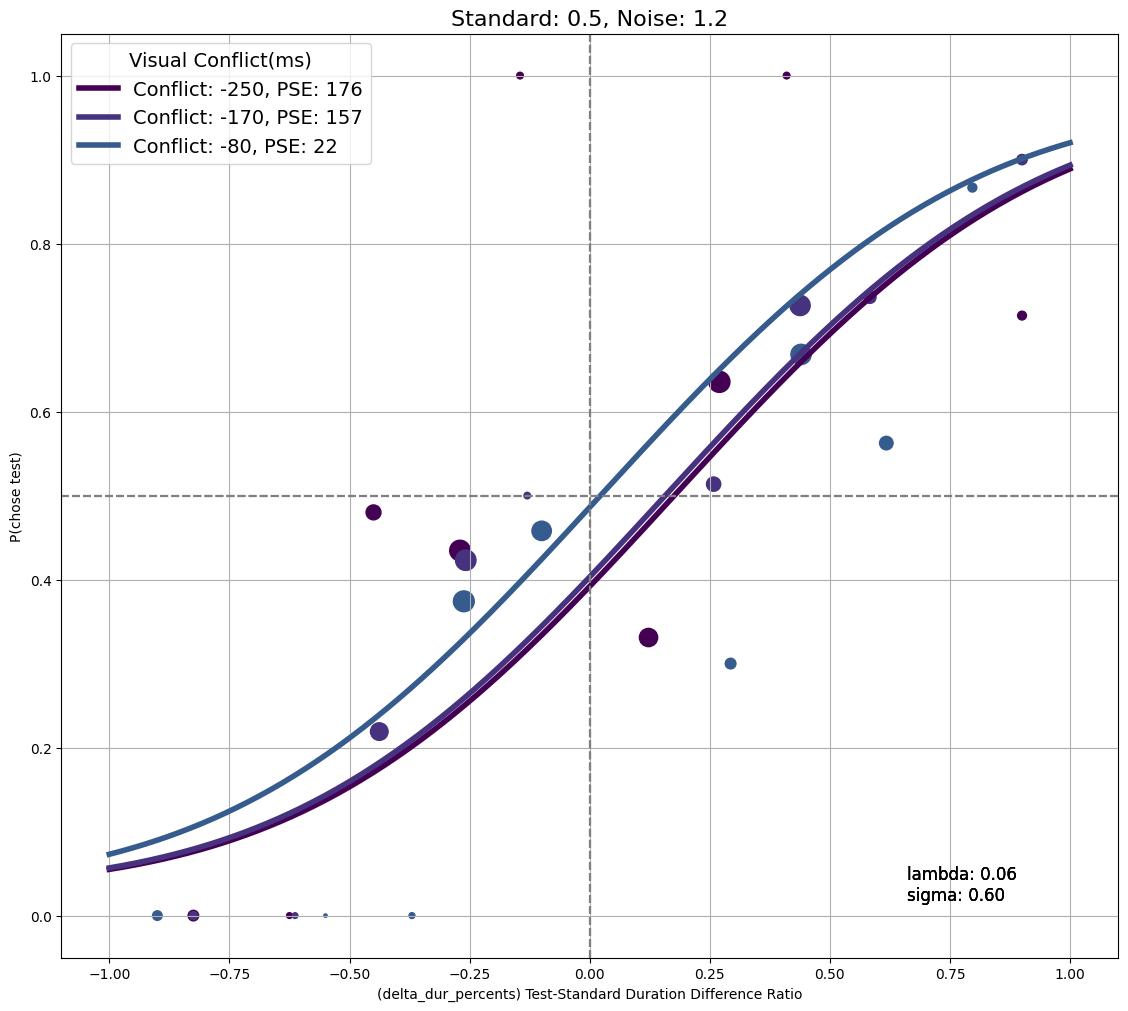

In [ ]:
lambda_, mu, sigma = best_fit.x[:nLambda], best_fit.x[nLambda:nLambda+nSigma], best_fit.x[nLambda+nSigma:]
plt.figure(figsize=(12*2.5, 6*2))
m=0
for i, standardLevel in enumerate(uniqueStandard):
    print(f"fitted lambda: {lambda_}")
    for j, audioNoiseLevel in enumerate(uniqueSensory):
        for k, conflictLevel in enumerate(uniqueConflict):
            lambda_, mu, sigma = get_params(best_fit.x, conflictLevel, audioNoiseLevel, nLambda, nSigma)
            m+=1        
            
            # Filter the data for the current standard and audio noise levels
            df=data[data[standardVar]==standardLevel]
            df=df[df[sensoryVar]==audioNoiseLevel]
            df=df[df[conflictVar]==conflictLevel]
            print(f"fitting for standard: {standardLevel}, noise: {audioNoiseLevel}, conflict: {conflictLevel}")
            print(f"lambda: {lambda_:.3f}, mu: {mu:.3f}, sigma: {sigma:.3f}")
            dfFiltered=groupByChooseTest(df)
            levels = dfFiltered[intensityVariable].values
            if len(levels) == 0:
                continue
            responses = dfFiltered['num_of_chose_test'].values
            totalResponses = dfFiltered['total_responses'].values
            


            # Fit the psychometric function
            plt.subplot(1, 2, j+1)
            maxX= max(levels)+0.1
            minX= min(levels)-0.1
            #plt.ylim(0, 1)
            
            #plt.xlim(-1, maxX)
            x=np.linspace(minX, maxX, 500)
            y = psychometric_function(x, lambda_, mu, sigma)
            color=sns.color_palette("viridis", as_cmap=True)(k / len(uniqueConflict))  # Use a colormap for different conflict levels
            plt.plot(x, y, color=color, label=f"Conflict: {int(conflictLevel*1000)}, PSE: {int(mu*1000)}", linewidth=4)
            
            #plt.scatter(levels, responses/totalResponses, color=color) # plot real data
            plt.axvline(x=0, color='gray', linestyle='--',)
            plt.axhline(y=0.5, color='gray', linestyle='--')
            plt.xlabel(f"({intensityVariable}) Test-Standard Duration Difference Ratio")
            plt.ylabel("P(chose test)")
            plt.title(f"Standard: {standardLevel}, Noise: {audioNoiseLevel}", fontsize=16)
            plt.legend(title="Visual Conflict(ms)", fontsize=14, title_fontsize=14)
            plt.grid()
            bin_and_plot(dfFiltered, bin_method='cut', bins=10, plot=True,color=color)
            plt.text( 0.8, 0.1, f"lambda: {lambda_:.2f}\nsigma: {sigma:.2f}", fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)




In [ ]:
print(f"lambda: {lambda_:.3f}, mu: {mu:.3f}, sigma: {sigma:.3f}")

lambda: 0.063, mu: 0.022, sigma: 0.176


# 3-Bootstrap

### 3.1- Simulate data

In [ ]:
def simulate_dataset(params, gdf):
    """
    Produce one synthetic data set that has the SAME predictors
    (delta, conflict, noise, total_responses) as 'gdf' but with
    binomially simulated response counts.
    """
    sim_gdf = gdf.copy()

    # vectorised computation to avoid Python loop
    lam   = np.empty(len(gdf))
    mu    = np.empty(len(gdf))
    sigma = np.empty(len(gdf))

    # Map each row's (conflict, noise) to its λ, μ, σ
    for idx, row in gdf.iterrows():
        lam_i, mu_i, sig_i = get_params(params,
                                        row[conflictVar],
                                        row[sensoryVar],
                                        nLambda,
                                        nSigma)
        lam[idx], mu[idx], sigma[idx] = lam_i, mu_i, sig_i

    p_choose_test = psychometric_function(sim_gdf[intensityVariable].values,
                                          lam, mu, sigma)

    # Binomial draw
    sim_gdf['num_of_chose_test'] = np.random.binomial(
        n = sim_gdf['total_responses'].values.astype(int),
        p = p_choose_test)

    return sim_gdf


In [ ]:
def paramBootstrap(fitParams, nBoots):
    nBootParams = []
    # Add tqdm progress bar
    for _ in tqdm(range(nBoots), desc="Bootstrapping", unit="iteration"):
        #1- do simulation
        simData = simulate_dataset(fitParams, groupedData)
        # simulate data by taking binomials at this
        initGuessEstimate = estimate_initial_guesses(simData[intensityVariable].values, 
                                                    simData['num_of_chose_test'], 
                                                    simData['total_responses'])
        # fit the data to boot
        bootFit = fit_psychometric_function_M(grouped_data=simData, initGuesses=initGuessEstimate)

        # save
        nBootParams.append(bootFit.x)

    return np.vstack(nBootParams)

In [ ]:
allBootedFits=paramBootstrap(best_fit.x,100)

NameError: name 'best_fit' is not defined

In [ ]:

# New plot showing the relation between the conflict and pse so that conflict should be on x axis and pse(mu based on conflict level) on y axis
plt.figure(figsize=(12, 6))
m=0
for i, standardLevel in enumerate(uniqueStandard):
    print(f"fitted lambda: {lambda_}")
    for j, audioNoiseLevel in enumerate(uniqueSensory):
        for k, conflictLevel in enumerate(uniqueConflict):
            lambda_, mu, sigma = get_params(best_fit.x, conflictLevel, audioNoiseLevel, nLambda, nSigma)
            m+=1        
            plt.subplot(1, 2, j+1)
            color=sns.color_palette("viridis", as_cmap=True)(k / len(uniqueConflict))  # Use a colormap for different conflict levels
            plt.scatter(conflictLevel*1000, mu*1000/2, color=color, s=100) # plot real data
            plt.xlabel(f"Visual Conflict(ms)")
            plt.ylabel("PSE (ms)")
            plt.title(f"Standard: {standardLevel}, Noise: {audioNoiseLevel}")
            plt.grid()
            plt.axhline(y=0, color='gray', linestyle='--')
            plt.axvline(x=0, color='gray', linestyle='--')
            #plt.ylim(-300, 300)

            mu_idx = nLambda + nSigma + ((j) * len(uniqueConflict)) + k

            # select mus for allBootedFits
            mu_all = allBootedFits[:, mu_idx]
            # calculate confidence intervals 95%
            mu_ci = np.percentile(mu_all, [2.5, 97.5])
            # plot confidence intervals as error bars
            plt.errorbar(conflictLevel*1000, mu*1000/2, yerr=[[mu*1000/2-mu_ci[0]*1000/2], [mu_ci[1]*1000-mu*1000]], fmt='o', color=color, capsize=10
                         , label=f"95% CI for mu: {mu_ci[0]*1000:.2f} - {mu_ci[1]*1000/2:.2f}", linewidth=3)
            plt.ylim(-350, 350)

# Fit the psychometric function to the grouped data
#result = fit_psychometric_function(grouped, intensityVariable)

NameError: name 'plt' is not defined

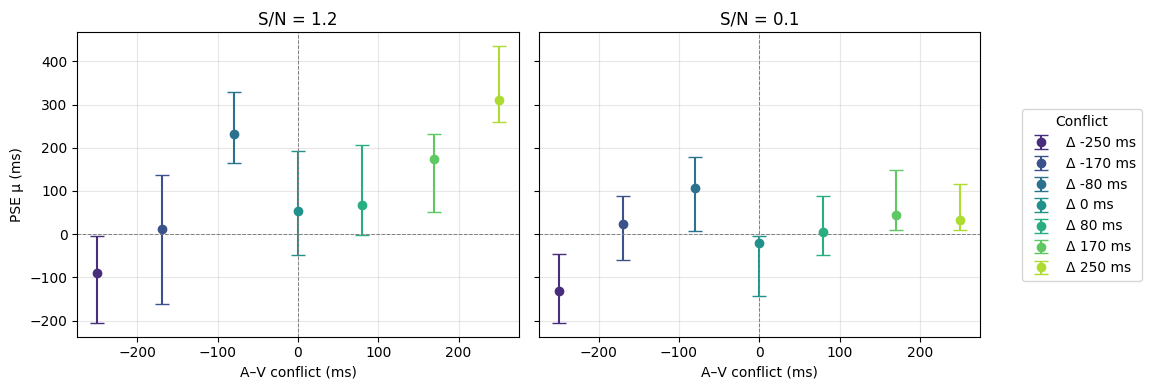

In [ ]:
fig, ax = plt.subplots(1, len(uniqueSensory), figsize=(10,4), sharey=True)
palette = sns.color_palette("viridis", n_colors=len(uniqueConflict))

# build index once
mu_idx = {(n,c): nLambda+nSigma+i*len(uniqueConflict)+j
          for i,n in enumerate(uniqueSensory)
          for j,c in enumerate(uniqueConflict)}

for j, noise in enumerate(uniqueSensory):
    for k, conflict in enumerate(uniqueConflict):
        idx     = mu_idx[(noise, conflict)]
        mu_ms   = best_fit.x[idx] * 1e3
        mu_boot = allBootedFits[:, idx] * 1e3
        ci_low, ci_high = np.percentile(mu_boot, [2.5, 97.5])

        ax[j].errorbar(conflict*1e3, mu_ms,
                       yerr=[[mu_ms-ci_low], [ci_high-mu_ms]],
                       fmt='o', color=palette[k], capsize=5,
                       label=f'Δ {conflict*1e3:.0f} ms' if j==0 else "")

    ax[j].set_title(f'S/N = {noise}')
    ax[j].set_xlabel('A–V conflict (ms)')
    ax[j].axhline(0, ls='--', c='grey', lw=.7)
    ax[j].axvline(0, ls='--', c='grey', lw=.7)
    ax[j].grid(alpha=.3)

ax[0].set_ylabel('PSE μ (ms)')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Conflict', bbox_to_anchor=(1.02,.5),
           loc='center left'); 
fig.tight_layout();  plt.show()


μ via helper: -0.090415  |  μ via index: -0.090415


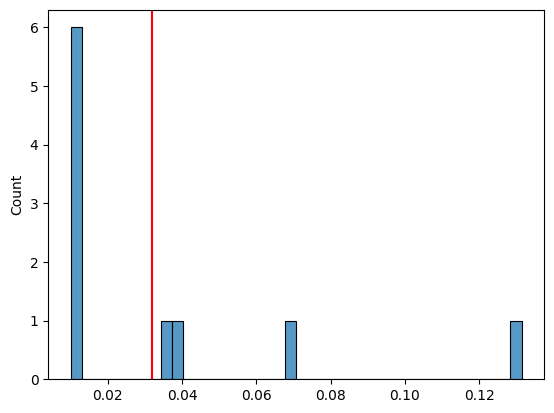

In [ ]:
# sanity: retrieve the first μ two ways
λ1, μ1, σ1 = get_params(best_fit.x,
                        conflict=uniqueConflict[0],
                        audio_noise=uniqueSensory[0],
                        nLambda=nLambda, nSigma=nSigma)

idx_0_0 = nLambda + nSigma# noise=0, conflict=0
μ2 = best_fit.x[idx_0_0]

print(f"μ via helper: {μ1:.6f}  |  μ via index: {μ2:.6f}")


# Plot the mu values
sns.histplot(mu_all, bins=40); plt.axvline(mu, color='r')




In [ ]:
breakthecode()

NameError: name 'breakthecode' is not defined

# Model for causal inference

In [ ]:
# Create dataframe of empirical PSEs from your fitted model
pse_data = []

for noise in uniqueSensory:
    for conflict in uniqueConflict:
        _, mu, _ = get_params(best_fit.x, conflict, noise, nLambda, nSigma)
        pse_data.append({
            'audNoise': noise,
            'conflictDur': conflict,
            'empirical_PSE': mu
        })

pse_df = pd.DataFrame(pse_data)


In [ ]:
def predict_pse_bci(mu_A, mu_V, p_common, w_A=0.6):
    """
    mu_A: actual auditory delta (typically 0)
    mu_V: visual conflict
    p_common: belief in common cause [0-1]
    w_A: weight assigned to auditory in integrated case
    """
    mu_integrated = w_A * mu_A + (1 - w_A) * mu_V
    return p_common * mu_integrated + (1 - p_common) * mu_A


In [ ]:
from scipy.optimize import minimize

def fit_pc_per_noise(pse_df, w_A=0.6):
    pc_fits = {}
    for noise in pse_df['audNoise'].unique():
        subset = pse_df[pse_df['audNoise'] == noise]

        def mse_loss(p_c):
            preds = predict_pse_bci(
                mu_A=0,
                mu_V=subset['conflictDur'].values,
                p_common=p_c[0],
                w_A=w_A
            )
            return np.mean((preds - subset['empirical_PSE'].values)**2)

        result = minimize(mse_loss, x0=[0.5], bounds=[(0, 1)])
        pc_fits[noise] = result.x[0]
    
    return pc_fits


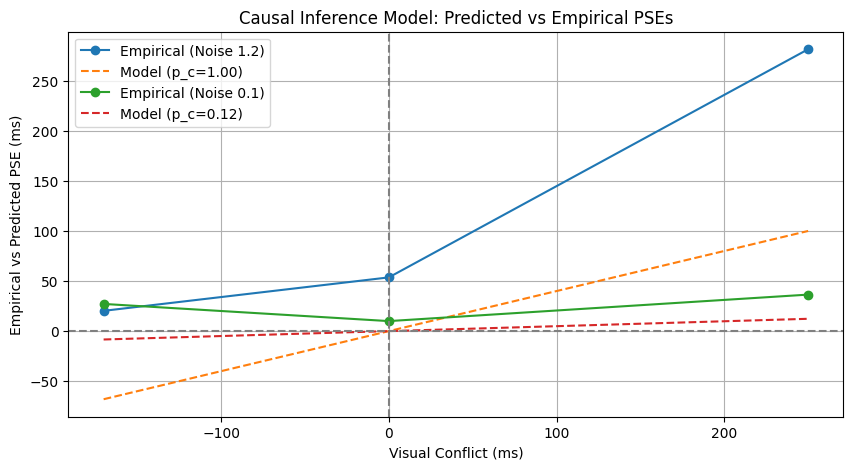

In [ ]:
pc_by_noise = fit_pc_per_noise(pse_df, w_A=0.6)

plt.figure(figsize=(10, 5))
for noise in uniqueSensory:
    subset = pse_df[pse_df['audNoise'] == noise]
    p_c = pc_by_noise[noise]
    predicted = predict_pse_bci(mu_A=0, mu_V=subset['conflictDur'].values, p_common=p_c, w_A=0.6)

    plt.plot(subset['conflictDur']*1000, subset['empirical_PSE']*1000, 'o-', label=f'Empirical (Noise {noise})')
    plt.plot(subset['conflictDur']*1000, predicted*1000, '--', label=f'Model (p_c={p_c:.2f})')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Visual Conflict (ms)")
plt.ylabel("Empirical vs Predicted PSE (ms)")
plt.legend()
plt.title("Causal Inference Model: Predicted vs Empirical PSEs")
plt.grid()
plt.show()


In [ ]:
# Define your known sigmas
sigma_v = 0.5
sigma_a_by_noise = {0.1: 0.22, 1.2: 0.8}

def compute_weights(sigma_a, sigma_v):
    w_a = 1 / sigma_a**2
    w_v = 1 / sigma_v**2
    w_A = w_a / (w_a + w_v)
    w_V = 1 - w_A
    return w_A, w_V

def predict_pse_bci_weighted(conflict, sigma_a, sigma_v, p_c):
    """
    Predict PSE using precision-based weights and causal inference blending.
    Assumes mu_A = 0 and mu_V = conflict.
    """
    _, w_V = compute_weights(sigma_a, sigma_v)
    return p_c * w_V * conflict

def fit_pc_per_noise_weighted(pse_df, sigma_v, sigma_a_by_noise):
    pc_fits = {}
    for noise in pse_df['audNoise'].unique():
        sigma_a = sigma_a_by_noise[noise]
        subset = pse_df[pse_df['audNoise'] == noise]

        def mse_loss(p_c):
            preds = [predict_pse_bci_weighted(row['conflictDur'], sigma_a, sigma_v, p_c[0])
                     for _, row in subset.iterrows()]
            return np.mean((subset['empirical_PSE'].values - preds)**2)

        result = minimize(mse_loss, x0=[0.5], bounds=[(0, 1)])
        pc_fits[noise] = result.x[0]
    
    return pc_fits


P common (weighted): {1.2: 1.0, 0.1: 0.3034482446273982}


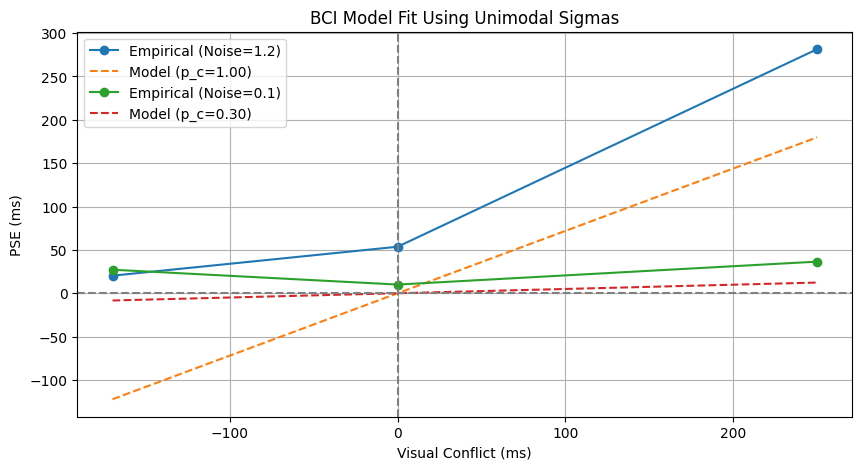

In [ ]:
pc_weighted = fit_pc_per_noise_weighted(pse_df, sigma_v=0.5, sigma_a_by_noise=sigma_a_by_noise)
print(f"P common (weighted): {pc_weighted}")
plt.figure(figsize=(10, 5))
for noise in uniqueSensory:
    subset = pse_df[pse_df['audNoise'] == noise]
    p_c = pc_weighted[noise]
    sigma_a = sigma_a_by_noise[noise]
    predicted = [predict_pse_bci_weighted(row['conflictDur'], sigma_a, sigma_v, p_c) for _, row in subset.iterrows()]

    plt.plot(subset['conflictDur']*1000, subset['empirical_PSE']*1000, 'o-', label=f"Empirical (Noise={noise})")
    plt.plot(subset['conflictDur']*1000, np.array(predicted)*1000, '--', label=f"Model (p_c={p_c:.2f})")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Visual Conflict (ms)")
plt.ylabel("PSE (ms)")
plt.title("BCI Model Fit Using Unimodal Sigmas")
plt.legend()
plt.grid()
plt.show()


# PLotting

In [ ]:
conflictLeves=sorted(data[conflictVar].unique())
standardDurLevels=sorted(data[standardVar].unique())
noiseLevels=sorted(data[sensoryVar].unique())
print(f"Standard duration levels: {standardDurLevels}, Conflict levels: {conflictLeves}, Noise levels: {noiseLevels}")

Standard duration levels: [0.5], Conflict levels: [-0.17, 0.0, 0.25], Noise levels: [0.1, 1.2]


In [ ]:
fig_w = 8
fig_h = 5

fitted lambda 0.005841592148580809 
At noise level 0.1 fitted sigma 0.6 
Noise: 0.1, Conflict: -0.17, fit sigma: 0.6 fit mu: 0.020240467410141093


ValueError: Cannot cut empty array

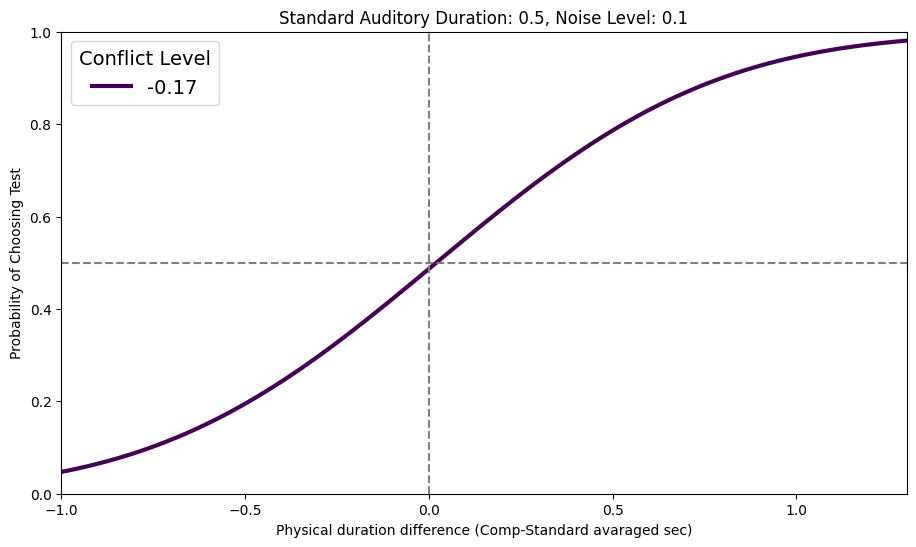

In [ ]:
plt.figure(figsize=(8*3,3*2))
#plt.Subplot(3,2)

m=0
for i, standardLevel in enumerate(standardDurLevels):
    lambda_ = best_fit.x[0]
    print(f"fitted lambda {lambda_} ")
    for j, noiseLevel in enumerate(noiseLevels):
        sigma=best_fit.x[j+1]
        print(f"At noise level {noiseLevel } fitted sigma {sigma} ")
        for k, conflictLevel in enumerate(conflictLeves):
            m+=1        
            
            mu=best_fit.x[m+2]
            #filter data
            df=data[data['conflictDur']==conflictLevel]
            df= df[df["standardDur"]==standardLevel]
            df=df[df["riseDur"]==noiseLevel]
            dfFiltered=groupByChooseTest(df)
            # select levels
            levels=dfFiltered[intensityVariable].values
            responses=dfFiltered['num_of_chose_test'].values
            totalResponses=dfFiltered['total_responses'].values
            # print fitted parameters

            print(f"Noise: {noiseLevel}, Conflict: {conflictLevel}, fit sigma: {sigma} fit mu: {mu}")
            # plot psychometric function
            plt.subplot(1,2,j+1)
            maxX = max(levels) if len(levels) > 0 else 1.3  # Handle case with no levels
            if maxX < 1.3:
                maxX = 1.3
            plt.xlim(-1, maxX)
            plt.ylim(0, 1)
            x = np.linspace(-1, maxX, 100)

            y = psychometric_function(x, lambda_,mu,sigma)  # Use muA0_fit for the mean

            color=sns.color_palette("viridis", as_cmap=True)(k / len(conflictLeves))  # Use a colormap for different conflict levels
            plt.plot(x, y, label=round(conflictLevel, 2), color=color, linewidth=3)  # Plot the fitted psychometric function
            plt.axvline(x=0, color='gray', linestyle='--',)
            plt.axhline(y=0.5, color='gray', linestyle='--')
            plt.xlabel('Physical duration difference (Comp-Standard avaraged sec)')
            plt.ylabel('Probability of Choosing Test')
            plt.title(f'Standard Auditory Duration: {round(standardLevel,2)}, Noise Level: {round(noiseLevel,2)}')
            # add fitted parameters to the plot
            # plt.text(0.3, 0.2, f'lambda: {fitted_params[0]:.2f}\nmu: {fitted_params[1]:.2f}\nsigma: {fitted_params[2]:.2f}', fontsize=12, 
            #          bbox=dict(facecolor='white', alpha=0.5))
            plt.legend(title="Conflict Level", fontsize=14, title_fontsize=14)
            bin_and_plot(dfFiltered, bin_method='cut', bins=8, plot=True,color=color)
            
